# Projeto de analise do mercado financeiro


*   Análise das ações da Magalu
*   Séries temporais de janeiro de 2021 a janeiro de 2022



In [ ]:
base_dados= 'https://docs.google.com/spreadsheets/d/1r0_Vs5QX1ef5X1MZCbDg8kcqm-my3rSn/edit?usp=sharing&ouid=108903987275959757465&rtpof=true&sd=true'


In [ ]:
# Libs Necessárias

# Libs para Modelagem e Matrizes
import numpy as np
import pandas as pd

# Libs para análises gráficas
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go

# Lib para ignorar avisos
import warnings

# Desabilitando avisos
warnings.filterwarnings('ignore')

In [ ]:
mercado = pd.read_excel('Vase_004 - Magalu - Sem Resolução.xlsx')

In [ ]:
#verificar se os dados precisam ser modificados. não foi necessário, uma vez que a data tem o formato datetime e os
#dados estão no formato float
mercado.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 247 entries, 0 to 246
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Data        247 non-null    datetime64[ns]
 1   Maior       247 non-null    float64       
 2   Menor       247 non-null    float64       
 3   Abertura    247 non-null    float64       
 4   Fechamento  247 non-null    float64       
 5   Volume      247 non-null    int64         
 6   Adj Close   247 non-null    float64       
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 13.6 KB


In [ ]:
dados = mercado.set_index('Data')
dados.head()

,Maior,Menor,Abertura,Fechamento,Volume,Adj Close
Data,,,,,,
2021-01-04,25.580000,24.870001,25.260000,25.200001,25706100,25.181740
2021-01-05,25.180000,24.340000,25.100000,24.760000,25431900,24.742058
2021-01-06,24.660000,23.420000,24.650000,23.459999,51799000,23.442999
2021-01-07,23.850000,22.950001,23.639999,23.160000,42146600,23.143217
2021-01-08,24.299999,23.020000,23.190001,23.840000,43988100,23.822723


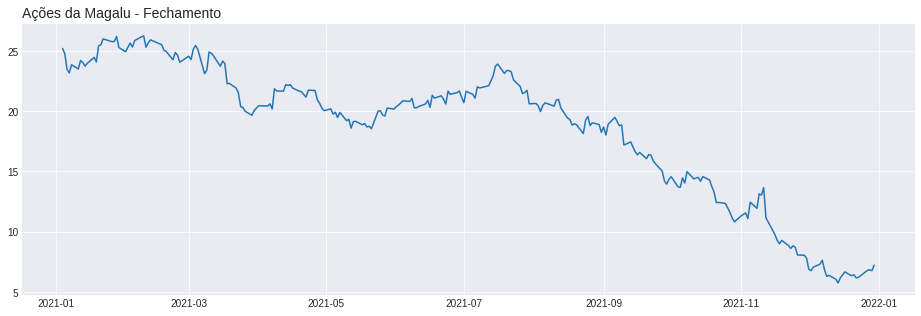

In [ ]:
plt.style.use('seaborn-darkgrid') #deixar o background azul claro
plt.figure(figsize = (16,5))
plt.title('Ações da Magalu - Fechamento', fontsize = 14, loc = 'left')
plt.plot(dados.index, dados['Fechamento'])

In [ ]:
#pra fazer média móvel
media_movel = dados['Fechamento'].rolling(5).mean()
#média tendência
media_tendencia = dados['Fechamento'].rolling(30).mean()

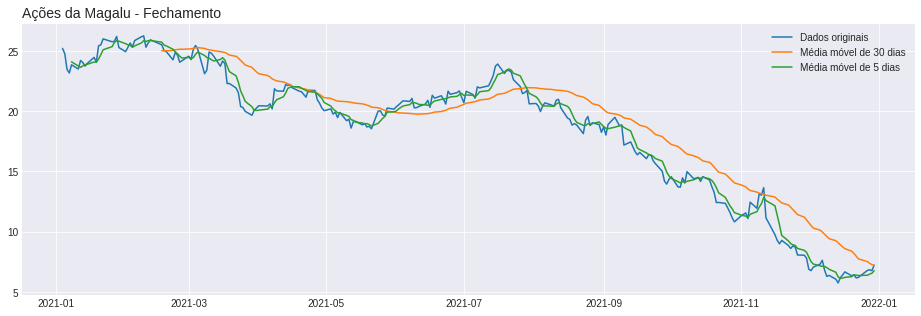

In [ ]:
#plotar a serie dessas médias
plt.style.use('seaborn-darkgrid') #deixar o background azul claro
plt.figure(figsize = (16,5))
plt.title('Ações da Magalu - Fechamento', fontsize = 14, loc = 'left')
plt.plot(dados.index, dados['Fechamento'], label = 'Dados originais')
plt.plot(media_tendencia.index, media_tendencia, label = 'Média móvel de 30 dias')
plt.plot(media_movel.index, media_movel, label = 'Média móvel de 5 dias')
plt.legend(loc = 'best')

In [ ]:
dados['Mes'] = dados.index.month

In [ ]:
dados.head()

,Maior,Menor,Abertura,Fechamento,Volume,Adj Close,Mes
Data,,,,,,,
2021-01-04,25.580000,24.870001,25.260000,25.200001,25706100,25.181740,1
2021-01-05,25.180000,24.340000,25.100000,24.760000,25431900,24.742058,1
2021-01-06,24.660000,23.420000,24.650000,23.459999,51799000,23.442999,1
2021-01-07,23.850000,22.950001,23.639999,23.160000,42146600,23.143217,1
2021-01-08,24.299999,23.020000,23.190001,23.840000,43988100,23.822723,1


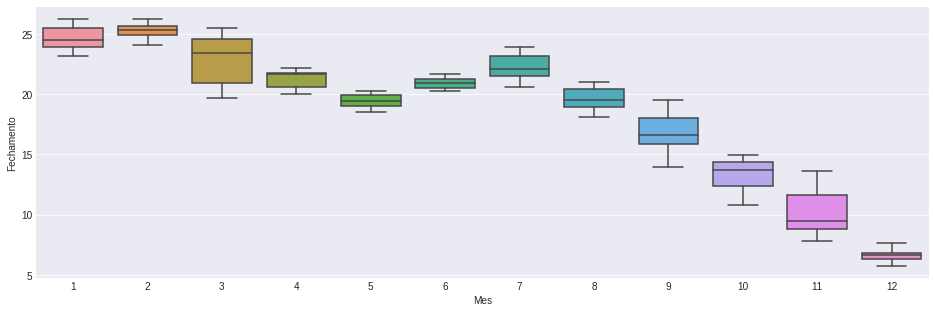

In [ ]:
#boxplot com os mes
plt.figure( figsize=(16, 5) )
sns.boxplot( data=dados, x='Mes', y='Fechamento' );

In [ ]:
#grafico pra fazer o plot tipo bovespa
Grafico =  go.Figure(
    data =[ go.Candlestick(
        x = dados.index,
        open = dados['Abertura'],
        high = dados['Maior'],
        low = dados['Menor'],
        close = dados['Fechamento'],
    )
    ]
)
Grafico.update_layout(xaxis_rangeslider_visible = False)
Grafico.show()